In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000921590"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000921590
SIC,6035
Description,"SAVINGS INSTITUTION, FEDERALLY CHARTERED"
Name,VALLEY FINANCIAL CORP /VA/
Ticker,VYFC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,31.0,8.713226e+00,1.559913e+00,6.1,7.54,8.63,9.36,12.0
interest income,52.0,7.651635e+06,2.219113e+06,3610000.0,7137000.00,8054000.00,8622250.00,16657000.0
net income,52.0,8.320385e+05,1.094641e+06,-4426000.0,669000.00,866000.00,1520500.00,2317000.0
net interest income,52.0,4.843923e+06,1.852559e+06,2178000.0,3728500.00,4577000.00,6282500.00,12201000.0
provision for loan losses,52.0,5.913846e+05,1.377715e+06,-436000.0,41250.00,245000.00,461750.00,8001000.0


# Plots

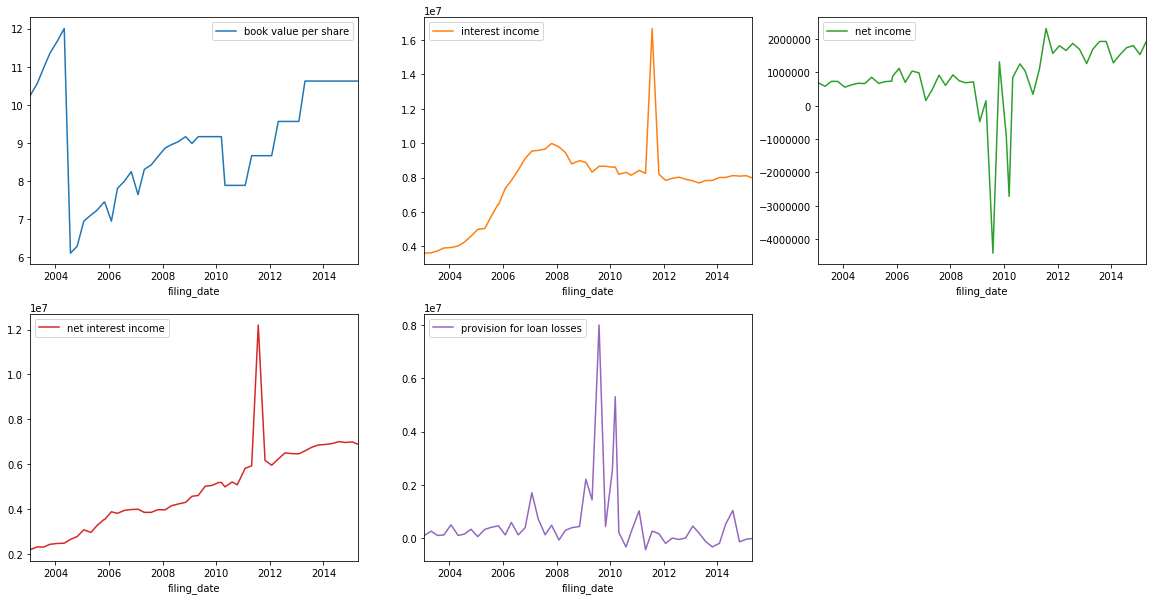

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000921590 book value per share                            2006Q4    missing   
           book value per share       2009Q2 to 2009Q4: 3 periods    missing   
           book value per share       2010Q2 to 2010Q4: 3 periods    missing   
           book value per share       2011Q2 to 2011Q4: 3 periods    missing   
           book value per share       2012Q2 to 2012Q4: 3 periods    missing   
           book value per share       2013Q2 to 2015Q1: 8 periods    missing   
           net income                                      2009Q4  duplicate   
           provision for loan losses                       2009Q4  duplicate   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000921590 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           net income                   Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()